In [1]:
''' Required packages. Use python3 -m pip install xxx for all the packages. '''
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
import easypyplot
# Automatically update if external package code is modified
%load_ext autoreload
%autoreload 2

In [2]:
''' Plot knobs. Change only if you want to resize the graph, etc. '''
fig_bar_width = 0.7
fig_dims = (4, 2)
fig_label_fontsize = 9
ft = fm.FontProperties('Times New Roman')
ft.set_size(fig_label_fontsize)

''' [TODO] Figure properties. Specify the csv file and corresponding labels. '''
csv_path = './sec2/motivation_skewness.csv'
workload_list = ['4KB', '16KB', '64KB']
scheme_list = ['C0_RBRate', 'C1_RBRate', 'C2_RBRate']
workload_dict = {item: item for item in workload_list} # Change the mapping if you want a different figure label text instead of the csv column name

scheme_dict = {item: item for item in scheme_list}
scheme_dict['C0_RBRate'] = 'Class 0 Stale Tail Size'
scheme_dict['C1_RBRate'] = 'Class 1 Stale Tail Size'
scheme_dict['C2_RBRate'] = 'Class 2 Stale Tail Size'

fig_title = '' # TODO: figure title, shown as y-axis label
fig_path = './sec2/'
fig_name = 'motivation_skewness'
fig_ylim = (0, 6.01)
fig_yticks = list(np.arange(fig_ylim[0], fig_ylim[1], 2.0))
fig_colors = [easypyplot.color.COLOR_SET[i] for i in [1, 0]] # TODO: choose enough colors for schemes
fig_bar_colors = ['#8ac8cb', '#ee7228', '#c00000']
assert len(fig_bar_colors) == len(scheme_dict)

print("Expect {} groups and {} entries within each group".format(len(workload_dict), len(scheme_dict)))

Expect 3 groups and 3 entries within each group


In [3]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
# TODO assert workload_name
# TODO assert scheme_name
fig_xlabels = []
fig_xticks = []
fig_data_2darr = []
xtick = -1
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in scheme_dict):
                row_value.append(row[col])
        fig_data_2darr.append(row_value)
        fig_xlabels.append(workload_fullname)
        xtick += 1
        fig_xticks.append(xtick)
assert len(fig_data_2darr) == len(fig_xlabels) == len(fig_xticks)

pprint(fig_data_2darr)

[[1, 2.744718577, 5.136987689],
 [1, 2.01792004, 3.332385837],
 [1, 1.3771980680000002, 1.614396135]]


In [4]:
''' Load data from file. '''
csv_hd = pd.read_csv(csv_path, sep=',')
# TODO assert workload_name
# TODO assert scheme_name
gc_xlabels = []
gc_xticks = []
gc_data_2darr = []
xtick = -1
gc_workload_list = ['4KB', '16KB', '64KB']
gc_scheme_list = ['C0_GCRate', 'C1_GCRate', 'C2_GCRate']
gc_workload_dict = {item: item for item in gc_workload_list}
gc_scheme_dict = {item: item for item in gc_scheme_list}
for idx, row in csv_hd.iterrows():
    workload_fullname = row[0]
    if any(workload in workload_fullname for workload in gc_workload_list):
        row_value = []
        for col in row.keys():
            if any(scheme in col for scheme in gc_scheme_dict):
                row_value.append(row[col])
        gc_data_2darr.append(row_value)
        gc_xlabels.append(workload_fullname)
        xtick += 1
        gc_xticks.append(xtick)
assert len(gc_data_2darr) == len(gc_xlabels) == len(gc_xticks)

pprint(gc_data_2darr)

[[1, 2.6970560000000003, 13.008289999999999],
 [1, 2.857326, 11.90064],
 [1, 3.016969, 12.40161]]


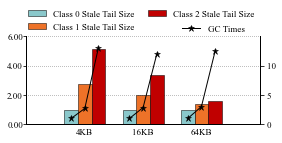

In [5]:
''' Ploting script '''
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
# ax = fig.gca() # Only used with no subplot mode
fig_ax = fig.add_subplot(1, 1, 1) # Knob: plot the first subgraph of a 1x1 grid, i.e., no subplot mode
gc_ax = fig_ax.twinx()
easypyplot.format.turn_off_box(fig_ax, twinx_axes=gc_ax)

fig_h = []
fig_h += easypyplot.barchart.draw(
    fig_ax, fig_data_2darr,
    width=fig_bar_width,
    breakdown=False,
    group_names=fig_xlabels,
    xticks=fig_xticks,
    xticklabelfontsize=fig_label_fontsize,
    # xticklabelrotation=25, # Knob: rotated x tick labels
    colors=fig_bar_colors)
''' x axis '''
fig_ax.xaxis.set_tick_params(pad=0) # Knob: distance between x tick label and x-axis
fig_ax.set_xlim([fig_ax.get_xticks()[0] - 1, fig_ax.get_xticks()[-1] + 1])
fig_ax.set_xticks(fig_xticks)
fig_ax.set_xticklabels(fig_xlabels, fontsize=fig_label_fontsize, fontproperties=ft)
fig_ax.xaxis.set_ticks_position('none') # Knob: uncomment for visible x ticks
# ax.tick_params(direction='in') # Knob: [in, out, inout]
# ax.set_xlabel(fig_title) # Knob: the overall x label text
''' y axis '''
fig_ax.yaxis.set_tick_params(pad=0) # Knob: distance between y tick label and y-axis
# easypyplot.format.set_axis_to_percent(fig_ax.yaxis) # Uncomment for y axis tick label in xx% format
fig_ax.yaxis.grid(True)
fig_ax.set_ylim(fig_ylim)
fig_ax.set_yticks(fig_yticks)
fig_yticks_label = ["{:.2f}".format(item) for item in fig_yticks] # Change for customized y tick label text
fig_ax.set_yticklabels(fig_yticks_label, fontproperties=ft)
fig_ax.set_ylabel(fig_title, multialignment='center', fontproperties=ft)

gc_xticks = []
for i in range(len(workload_list)):
    gc_itemxtick = [fig_xticks[i] - fig_bar_width / 3, fig_xticks[i], fig_xticks[i] + fig_bar_width / 3]
    gc_xticks.append(gc_itemxtick)
gc_h = []
for group_id in range(len(workload_dict)):
    gc_h += gc_ax.plot(gc_xticks[group_id], gc_data_2darr[group_id],
                marker='*',
                markersize=7,
                linewidth = '1.0',
                color='#000000',
                )
gc_ax.set_ylim((0, 15.01))
gc_ax.set_yticks(list(np.arange(0, 15, 5.0)))


''' legend '''
legend = [scheme_dict[item] for item in scheme_dict]
fig.legend(fig_h, legend, loc='upper center', frameon=False, prop=ft,
        bbox_to_anchor=(0.5, 1.15),
        ncol=2,
        numpoints=1,
        columnspacing=1.5, # padding between columns
        labelspacing=0.5, # padding between rows
        )
fig.legend(gc_h, ['GC Times'], loc='upper center', frameon=False, prop=ft,
        bbox_to_anchor=(0.75, 1.05),
        ncol=3,
        numpoints=1,
        columnspacing=1.5, # padding between columns
        labelspacing=0.5, # padding between rows
        )

''' last resize '''
plt.tight_layout()
easypyplot.format.resize_ax_box(fig_ax, hratio=0.8)

In [6]:
''' Save figures'''
fig.savefig(fig_path + fig_name+'.pdf', format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp) # BUG: it sometimes generates wierd chopped pdf figures
# fig.savefig(fig_name+'.svg', format="svg", bbox_inches = 'tight', transparent=False) # svg format